In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
import random

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
## read the data:
kaggle=0

if kaggle==1:
    
    train=pd.read_csv("/kaggle/input/cat-in-the-dat/train.csv")
    test=pd.read_csv("/kaggle/input/cat-in-the-dat/test.csv")
    sample=pd.read_csv("/kaggle/input/cat-in-the-dat/sample_submission.csv")
    
else:
    train=pd.read_csv("train.csv")
    test=pd.read_csv("test.csv")
    sample=pd.read_csv("sample_submission.csv")

In [4]:
df_train=train.copy()
df_test=test.copy()

In [3]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [ ]:
train.dtypes

In [ ]:
train.isnull().any(),test.isnull().any()

We dont have any null vales in the dataset.

In [5]:
for c in train.columns :
    if c not in ['id','target']:
        print(c,"has",train[c].nunique(),"unique values\n")

bin_0 has 2 unique values

bin_1 has 2 unique values

bin_2 has 2 unique values

bin_3 has 2 unique values

bin_4 has 2 unique values

nom_0 has 3 unique values

nom_1 has 6 unique values

nom_2 has 6 unique values

nom_3 has 6 unique values

nom_4 has 4 unique values

nom_5 has 222 unique values

nom_6 has 522 unique values

nom_7 has 1220 unique values

nom_8 has 2215 unique values

nom_9 has 11981 unique values

ord_0 has 3 unique values

ord_1 has 5 unique values

ord_2 has 6 unique values

ord_3 has 15 unique values

ord_4 has 26 unique values

ord_5 has 192 unique values

day has 7 unique values

month has 12 unique values



nom_5,nom_6,nom_7,nom_8,nom_9 has more cardinality compared to other variables.Lets check if there exist any unique values in test set for these columns.

In [5]:
for col in ['nom_5','nom_6','nom_7','nom_8','nom_9']:
    print(col,"has ",set(train[col].unique())-set(test[col].unique())," unique value in train set not available in test dataset\n")

nom_5 has  set()  unique value in train set not available in test dataset

nom_6 has  set()  unique value in train set not available in test dataset

nom_7 has  {'3460d7c4b'}  unique value in train set not available in test dataset

nom_8 has  {'9ae60926f', '50389c332', '40b8df5b6', 'ad1f8262c', 'dee8a6be0'}  unique value in train set not available in test dataset

nom_9 has  {'4169817e0', '22a5aedfa', 'b58415d80', '12fadf8cf', '8a906c3c8', '6db5e23d4', '80d423992', '867303e4a', 'e007edb63', 'df6060768', 'd98243119', 'e063e06cb', '6b6640e4b', 'cffaeca2e', 'bb5b3d10a', '981fa0f74', '84c6505ed', '06730ace5', '30dabd96d', '17e419c31', '729a1402f', '999d8a836', '72b8c6255', 'c0d98dc85', 'cf96f0be7', '76daad1ce', '8be64c238', 'eac459235', 'fd0f97917', '1c2487c11', 'f278f66ac', '66213efaf', 'bd30eb8c4', '9a43e4f89', '839e6b3d6', 'a6e3b2e55', '87e7625bc', 'b92175329', 'b370e6c97', 'cc3737162', '7c022a318', '7f33d956a', '403f98af1', '28c61ad29', 'b1d478247', '1cbb53760', '6167b570a', 'fc968cc9

From the result we understand that nom_7,nom_8 and nom_9 have values which are not present in the test dataset.The local CV score without removing these variable is 0.79910 . 

Now we will start experimenting with different encoding techniques.I will use the techniques described in this [kaggle course](https://www.kaggle.com/matleonard/categorical-encodings)

In [91]:
train.shape,test.shape

((300000, 40), (200000, 41))

In [63]:
train=df_train.copy()
test=df_test.copy()

In [7]:
train.columns,test.columns

(Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
        'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
        'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
        'target'],
       dtype='object'),
 Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
        'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
        'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
       dtype='object'))

## Experiement 2:

Our strategy is to one hot encode the binary categorical variables - bin_0 to bin_4,ordinal variables ord_0 to ord_2 , frequency encode the rest.We remove the cardinality of high cardinality variables by removing the variables present only 0.1 % of the data.Feature enginner new columns from ord_5 by splitting first and second letters in the string.

In [6]:
train['ord5_1']=train['ord_5'].str[0]
train['ord5_2']=train['ord_5'].str[1]
test['ord5_1']=test['ord_5'].str[0]
test['ord5_2']=test['ord_5'].str[1]

In [7]:
train.dtypes,test.dtypes

(id         int64
 bin_0      int64
 bin_1      int64
 bin_2      int64
 bin_3     object
 bin_4     object
 nom_0     object
 nom_1     object
 nom_2     object
 nom_3     object
 nom_4     object
 nom_5     object
 nom_6     object
 nom_7     object
 nom_8     object
 nom_9     object
 ord_0      int64
 ord_1     object
 ord_2     object
 ord_3     object
 ord_4     object
 ord_5     object
 day        int64
 month      int64
 target     int64
 ord5_1    object
 ord5_2    object
 dtype: object, id         int64
 bin_0      int64
 bin_1      int64
 bin_2      int64
 bin_3     object
 bin_4     object
 nom_0     object
 nom_1     object
 nom_2     object
 nom_3     object
 nom_4     object
 nom_5     object
 nom_6     object
 nom_7     object
 nom_8     object
 nom_9     object
 ord_0      int64
 ord_1     object
 ord_2     object
 ord_3     object
 ord_4     object
 ord_5     object
 day        int64
 month      int64
 ord5_1    object
 ord5_2    object
 dtype: object)

In [8]:
def reduce_memory(df,col):
    mx = df[col].max()
    print(f'\n reducing memory for {col}')
    if mx<256:
        df[col] = df[col].astype('uint8')
    elif mx<65536:
        df[col] = df[col].astype('uint16')
    else:
        df[col] = df[col].astype('uint32')

In [9]:



def reduce_cardi(train,test,col):
    print(f'\nBefore reducing the cardinality of col {c} in train was {train[c].nunique()}')
    cv1=pd.DataFrame(train[col].value_counts().reset_index().rename({col:'train'},axis=1))
    cv2=pd.DataFrame(test[col].value_counts().reset_index().rename({col:'test'},axis=1))
    cv3=pd.merge(cv1,cv2,on='index',how='outer')
    factor=len(train)/len(test)
    cv3['train'].fillna(0,inplace=True)
    cv3['test'].fillna(0,inplace=True)
    cv3['remove']=False
    cv3['remove']=cv3['remove']|(cv3['train']<len(train)/10000)  ## remove variables that appear 0.1 % of the total data in train.
    cv3['new'] = cv3.apply(lambda x: x['index'] if x['remove']==False else 0,axis=1)
    cv3['new'],_ = cv3['new'].factorize(sort=True)
    cv3.set_index('index',inplace=True)
    cc = cv3['new'].to_dict()
    train[col] = train[col].map(cc)
    
    test[col]=test[col].map(cc)
    #reduce_memory(test,col)

In [10]:
card_cols=['nom_9','nom_8','nom_5','nom_6','nom_7']

for c in card_cols:
    print(f'\nReducing cardinality for col {c}')
    reduce_cardi(train,test,c)
    reduce_memory(train,c)
    reduce_memory(test,c)
    print(f'\nAfter reducing the cardinality of col {c} in train is {train[c].nunique()}')


Reducing cardinality for col nom_9

Before reducing the cardinality of col nom_9 in train was 11981

 reducing memory for nom_9

 reducing memory for nom_9

After reducing the cardinality of col nom_9 in train is 4753

Reducing cardinality for col nom_8

Before reducing the cardinality of col nom_8 in train was 2215

 reducing memory for nom_8

 reducing memory for nom_8

After reducing the cardinality of col nom_8 in train is 1976

Reducing cardinality for col nom_5

Before reducing the cardinality of col nom_5 in train was 222

 reducing memory for nom_5

 reducing memory for nom_5

After reducing the cardinality of col nom_5 in train is 222

Reducing cardinality for col nom_6

Before reducing the cardinality of col nom_6 in train was 522

 reducing memory for nom_6

 reducing memory for nom_6

After reducing the cardinality of col nom_6 in train is 515

Reducing cardinality for col nom_7

Before reducing the cardinality of col nom_7 in train was 1220

 reducing memory for nom_7

 r

In [5]:
## Creating new features after doing one round of training and understanding the gini importance

# train['ord_1'+'_'+'ord_5']=train['ord_1']+"_"+train['ord_5']
# test['ord_1'+'_'+'ord_5']=test['ord_1']+"_"+test['ord_5']

# train['ord_1'+'_'+'ord_2']=train['ord_1']+"_"+train['ord_2']
# test['ord_1'+'_'+'ord_2']=test['ord_1']+"_"+test['ord_2']

# train['nom_6'+'_'+'nom_7']=train['nom_6']+'_'+train['nom_7']
# test['nom_6'+'_'+'nom_7']=test['nom_6']+'_'+test['nom_7']

In [ ]:
# a=train
# b=test

In [11]:
## OHE columns with less cardinality

cat_cols=['bin_0','bin_1','bin_2','bin_3','bin_4','ord_0','ord_1','ord_2']
#https://github.com/rushter/heamy/blob/c330854cee3c547417eb353a4a4a23331b40b4bc/heamy/feature.py

for column in cat_cols:
      
        cate = pd.concat([train[column], test[column]]).dropna().unique()

        train[column] = train[column].astype('category')
        test[column] = test[column].astype('category')

train = pd.get_dummies(train, columns=cat_cols, dummy_na=False, sparse=False)
test = pd.get_dummies(test, columns=cat_cols, dummy_na=False, sparse=False)


In [12]:
train.columns,test.columns

(Index(['id', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6',
        'nom_7', 'nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
        'target', 'ord5_1', 'ord5_2', 'bin_0_0', 'bin_0_1', 'bin_1_0',
        'bin_1_1', 'bin_2_0', 'bin_2_1', 'bin_3_F', 'bin_3_T', 'bin_4_N',
        'bin_4_Y', 'ord_0_1', 'ord_0_2', 'ord_0_3', 'ord_1_Contributor',
        'ord_1_Expert', 'ord_1_Grandmaster', 'ord_1_Master', 'ord_1_Novice',
        'ord_2_Boiling Hot', 'ord_2_Cold', 'ord_2_Freezing', 'ord_2_Hot',
        'ord_2_Lava Hot', 'ord_2_Warm'],
       dtype='object'),
 Index(['id', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6',
        'nom_7', 'nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
        'ord5_1', 'ord5_2', 'bin_0_0', 'bin_0_1', 'bin_1_0', 'bin_1_1',
        'bin_2_0', 'bin_2_1', 'bin_3_F', 'bin_3_T', 'bin_4_N', 'bin_4_Y',
        'ord_0_1', 'ord_0_2', 'ord_0_3', 'ord_1_Contributor', 'ord_1_Expert',
        'ord_1_Grandmaster', 'or

In [13]:
import category_encoders as ce

In [14]:
def frequency_encoding(variable):
    t = train[variable].value_counts().reset_index()
    t = t.reset_index()
    t.loc[t[variable] == 1, 'level_0'] = np.nan
    t.set_index('index', inplace=True)
    max_label = t['level_0'].max() + 1
    t.fillna(max_label, inplace=True)
    return t.to_dict()['level_0']

In [ ]:
# temp = test['nom_6_nom_7'].value_counts().reset_index()
# temp = temp.reset_index()
# temp.loc[temp['nom_6_nom_7'] == 1, 'level_0'] = np.nan
# temp.set_index('index', inplace=True)
# max_label = temp['level_0'].max() + 1
# temp.fillna(max_label, inplace=True)
# #temp.to_dict()['level_0'],max_label
# temp.isna().any()

In [15]:
ce_cols=['nom_0','nom_1','nom_2','nom_3','nom_4', 'ord_3', 'ord_4', 'ord_5', 'day', 'month','ord5_1','ord5_2']
## Remove day,month and newly created combined columns:
#ce_cols=['nom_0','nom_1','nom_2','nom_3','nom_4','nom_5','nom_6','nom_7','nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5']
## Remove cols that have been summarised earlier:
#ce_cols = [c for c in ce_cols if c not in eda_cols]

In [16]:
ce_cols

['nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'ord_3',
 'ord_4',
 'ord_5',
 'day',
 'month',
 'ord5_1',
 'ord5_2']

In [76]:
# for c in ce_cols:
#     print(f'\nConverting {c} to lower case')
#     train[c]=train[c].str.lower()
#     test[c]=test[c].str.lower()

In [77]:
# cat_boost=ce.CatBoostEncoder(cols=ce_cols)
# cat_boost.fit(train[ce_cols],train['target'])

# train=train.join(cat_boost.transform(train[ce_cols]).add_suffix('_cb'))
# test=test.join(cat_boost.transform(test[ce_cols]).add_suffix('_cb'))

In [17]:
## Frequency encode variables:
for variable in tqdm(ce_cols):
    freq_encod_dict=frequency_encoding(variable)
    train[variable+'_FE']=train[variable].map(lambda x:freq_encod_dict.get(x,1))# return value as 1 if the variable does not exist in freq_encod_dict
    test[variable+'_FE']=test[variable].map(lambda x:freq_encod_dict.get(x,1))
    #categorical_columns.remove(variable)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.77it/s]


In [18]:
train.columns,test.columns

(Index(['id', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6',
        'nom_7', 'nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
        'target', 'ord5_1', 'ord5_2', 'bin_0_0', 'bin_0_1', 'bin_1_0',
        'bin_1_1', 'bin_2_0', 'bin_2_1', 'bin_3_F', 'bin_3_T', 'bin_4_N',
        'bin_4_Y', 'ord_0_1', 'ord_0_2', 'ord_0_3', 'ord_1_Contributor',
        'ord_1_Expert', 'ord_1_Grandmaster', 'ord_1_Master', 'ord_1_Novice',
        'ord_2_Boiling Hot', 'ord_2_Cold', 'ord_2_Freezing', 'ord_2_Hot',
        'ord_2_Lava Hot', 'ord_2_Warm', 'nom_0_FE', 'nom_1_FE', 'nom_2_FE',
        'nom_3_FE', 'nom_4_FE', 'ord_3_FE', 'ord_4_FE', 'ord_5_FE', 'day_FE',
        'month_FE', 'ord5_1_FE', 'ord5_2_FE'],
       dtype='object'),
 Index(['id', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6',
        'nom_7', 'nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
        'ord5_1', 'ord5_2', 'bin_0_0', 'bin_0_1', 'bin_1_0', 'bin_1_1',
        'bin_2_0', 'bin_

In [80]:
# test.isnull().any()

In [19]:
train.head()

,id,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,...,nom_2_FE,nom_3_FE,nom_4_FE,ord_3_FE,ord_4_FE,ord_5_FE,day_FE,month_FE,ord5_1_FE,ord5_2_FE
0,0,Green,Triangle,Snake,Finland,Bassoon,79,117,470,1511,...,2.0,3.0,2.0,5.0,22.0,161.0,0.0,0.0,0.0,44.0
1,1,Green,Trapezoid,Hamster,Russia,Piano,160,503,252,579,...,5.0,0.0,1.0,2.0,3.0,22.0,4.0,9.0,21.0,27.0
2,2,Blue,Trapezoid,Lion,Russia,Theremin,45,15,725,1728,...,0.0,0.0,3.0,5.0,4.0,24.0,4.0,0.0,16.0,1.0
3,3,Red,Trapezoid,Snake,Canada,Oboe,210,161,1059,560,...,2.0,1.0,0.0,4.0,22.0,23.0,0.0,2.0,0.0,36.0
4,4,Red,Trapezoid,Lion,Canada,Oboe,91,62,33,1578,...,0.0,1.0,0.0,2.0,4.0,4.0,4.0,9.0,1.0,0.0


In [20]:
ce_cols

['nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'ord_3',
 'ord_4',
 'ord_5',
 'day',
 'month',
 'ord5_1',
 'ord5_2']

In [21]:
train=train.drop(columns=ce_cols,axis=1)
test=test.drop(columns=ce_cols,axis=1)

In [44]:
# train=train.drop(columns=['nom_5','nom_6','nom_7','nom_8','ord_5'],axis=1)
# test=test.drop(columns=['nom_5','nom_6','nom_7','nom_8','ord_5'],axis=1)

In [88]:
# plt.figure(figsize=(30,30))
# sns.heatmap(train[feats].corr(), cmap='RdBu_r', annot=True, center=0.0)

### Modelling

In [22]:
##https://www.kaggle.com/kyakovlev/ieee-fe-for-local-test
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [23]:
seed_everything(1001)

In [24]:
##import required libraries:
from sklearn.model_selection import StratifiedKFold,GroupKFold
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from bayes_opt import BayesianOptimization
import gc
from tqdm import tqdm
#import lofo as lofo

In [25]:
## Split into train and validation:
y=train['target']
train.drop('target',axis=1,inplace=True)

In [36]:
n_folds=3
kf=StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=1001)
feats=[f for f in train.columns if f not in ['id','bin_0_1',
 'bin_1_1',
 'bin_2_0',
 'bin_3_F',
 'bin_4_N', 'ord_0_1','ord_1_Novice','ord_2_Lava Hot' ]]  # remove highly correlated features

In [37]:
oof_preds=np.zeros(train.shape[0])
sub_preds=np.zeros(test.shape[0])

feature_importance_df=pd.DataFrame()
categorical_features=[f for f in train.columns if f not in ['id','bin_0_1',
 'bin_1_1',
 'bin_2_0',
 'bin_3_F',
 'bin_4_N','ord_0_1','ord_1_Novice','ord_2_Lava Hot']]

In [38]:
categorical_features

['nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9',
 'bin_0_0',
 'bin_1_0',
 'bin_2_1',
 'bin_3_T',
 'bin_4_Y',
 'ord_0_2',
 'ord_0_3',
 'ord_1_Contributor',
 'ord_1_Expert',
 'ord_1_Grandmaster',
 'ord_1_Master',
 'ord_2_Boiling Hot',
 'ord_2_Cold',
 'ord_2_Freezing',
 'ord_2_Hot',
 'ord_2_Warm',
 'nom_0_FE',
 'nom_1_FE',
 'nom_2_FE',
 'nom_3_FE',
 'nom_4_FE',
 'ord_3_FE',
 'ord_4_FE',
 'ord_5_FE',
 'day_FE',
 'month_FE',
 'ord5_1_FE',
 'ord5_2_FE']

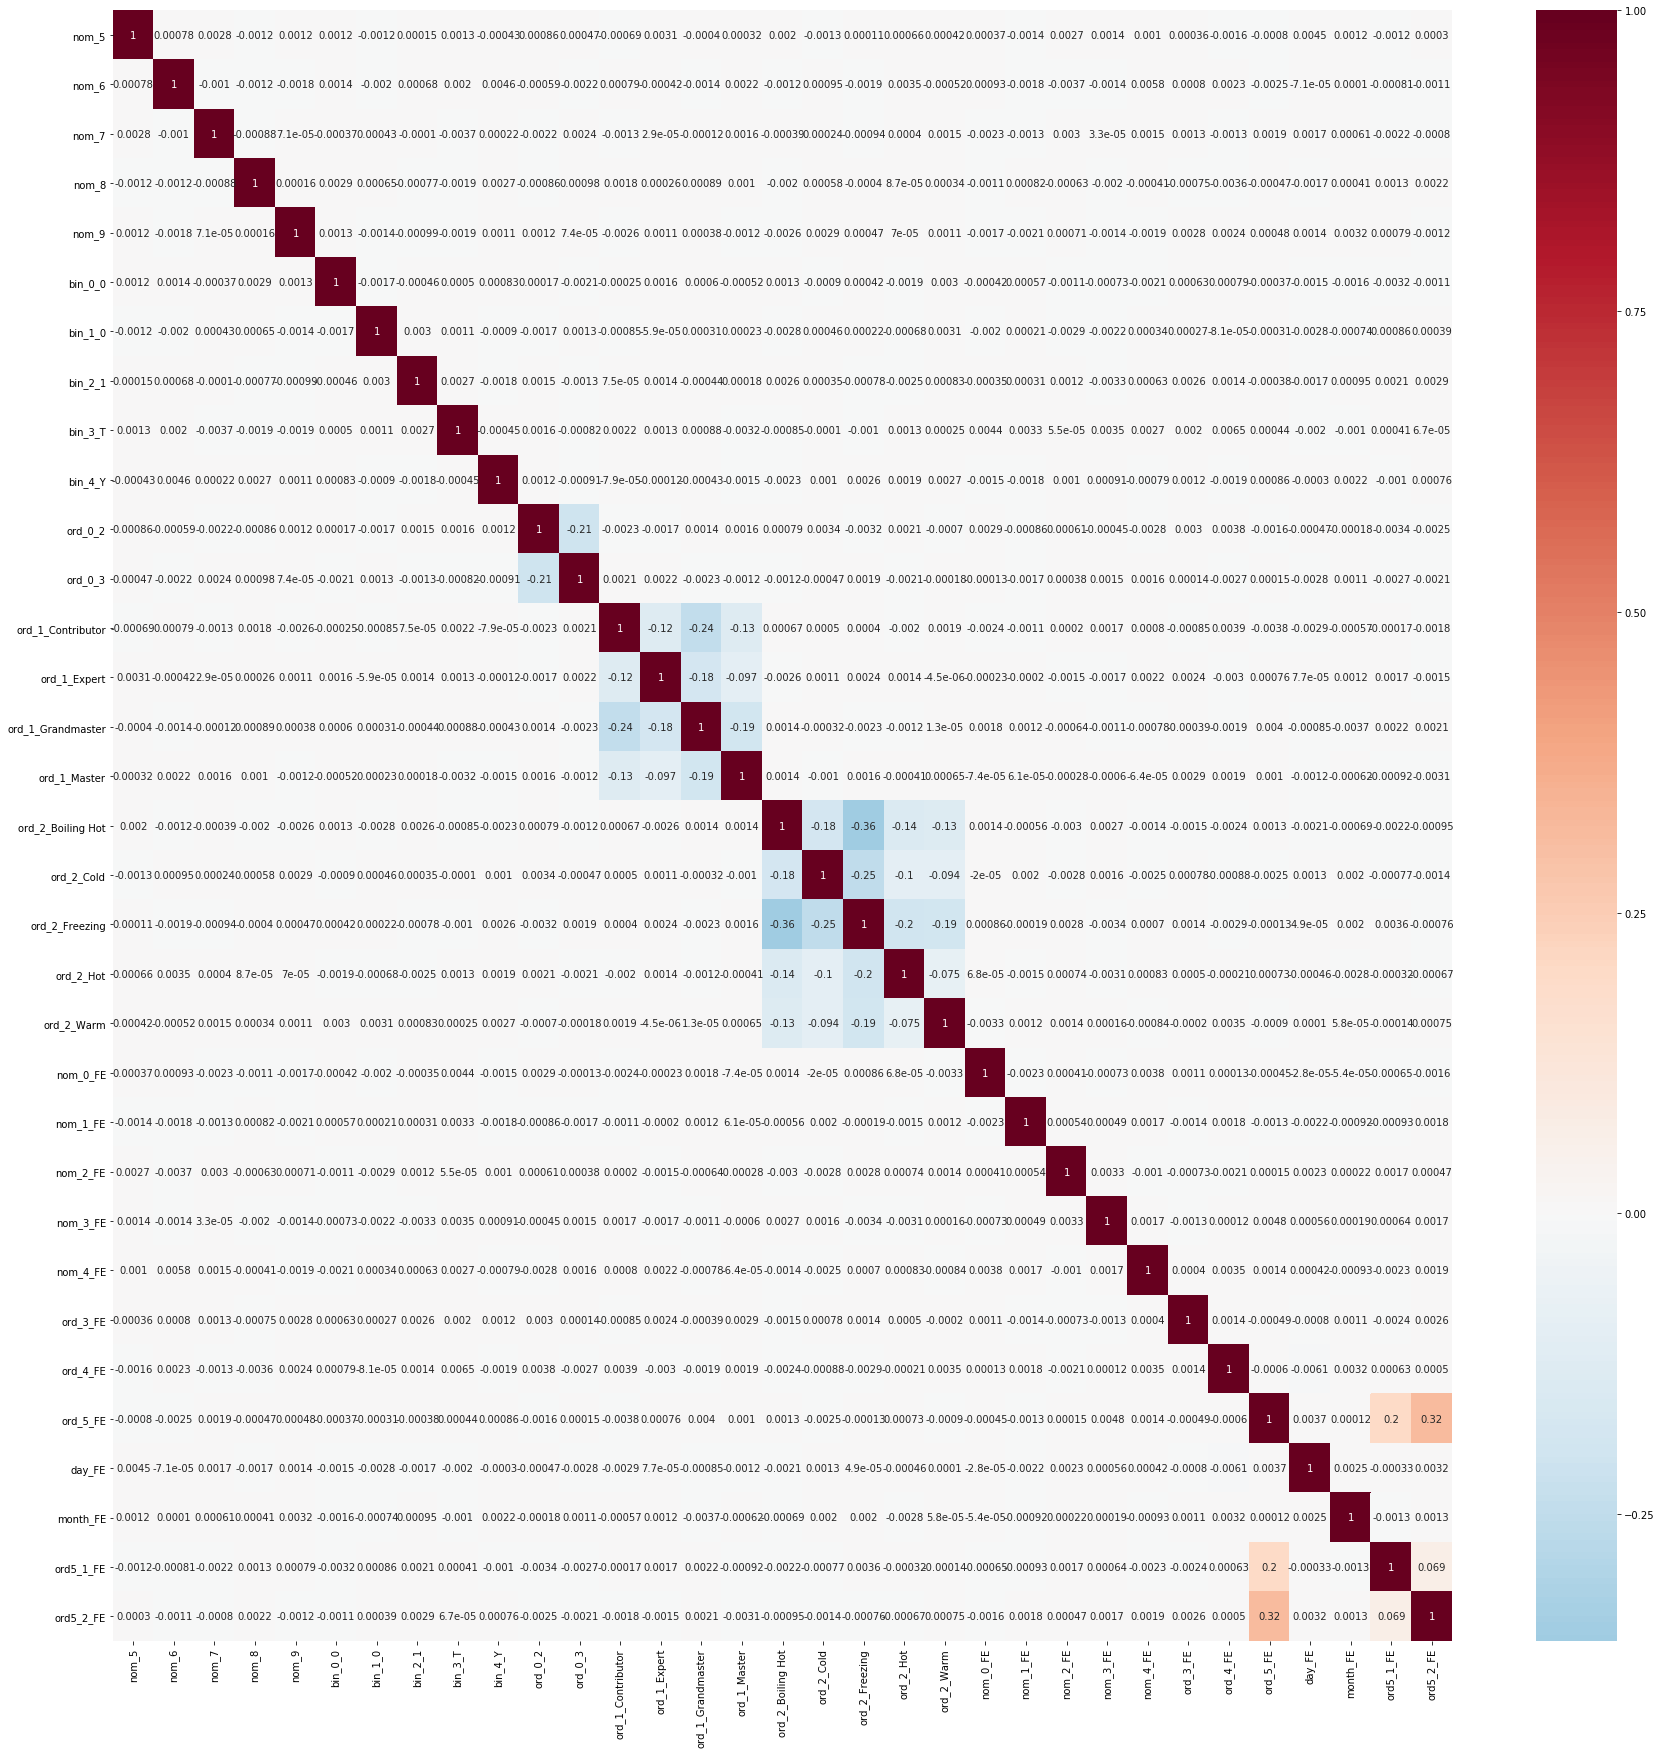

In [30]:
##https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id
plt.figure(figsize=(30,30))
sns.heatmap(train[feats].corr(), cmap='RdBu_r', annot=True, center=0.0)

In [31]:
cor=train[feats].corr()


In [32]:
##https://www.kaggle.com/gpreda/santander-eda-and-prediction
c=cor.unstack()
so=c.sort_values(kind='quicksort').reset_index().rename({0:'value'},axis=1)
so=so[so['level_0']!=so['level_1']]
print("Negative correlated features \n",so.head(10),"\nPositive correlated features\n",so.tail(10))

Negative correlated features 
              level_0            level_1     value
0  ord_2_Boiling Hot     ord_2_Freezing -0.355370
1     ord_2_Freezing  ord_2_Boiling Hot -0.355370
2         ord_2_Cold     ord_2_Freezing -0.251483
3     ord_2_Freezing         ord_2_Cold -0.251483
4  ord_1_Grandmaster  ord_1_Contributor -0.240835
5  ord_1_Contributor  ord_1_Grandmaster -0.240835
6            ord_0_3            ord_0_2 -0.205303
7            ord_0_2            ord_0_3 -0.205303
8          ord_2_Hot     ord_2_Freezing -0.199747
9     ord_2_Freezing          ord_2_Hot -0.199747 
Positive correlated features
         level_0    level_1     value
1046      nom_6   nom_4_FE  0.005805
1047   nom_4_FE      nom_6  0.005805
1048   ord_4_FE    bin_3_T  0.006506
1049    bin_3_T   ord_4_FE  0.006506
1050  ord5_2_FE  ord5_1_FE  0.069351
1051  ord5_1_FE  ord5_2_FE  0.069351
1052   ord_5_FE  ord5_1_FE  0.203051
1053  ord5_1_FE   ord_5_FE  0.203051
1054   ord_5_FE  ord5_2_FE  0.315881
1055  ord5_2_FE   

* From the above correlation plot it is seen that the summary features correlate with their respective FE variables.Ord_0_1 , ord_0_2 and ord_0_3 show correlation with each other.

In [93]:
bayesian_tr_index, bayesian_val_index  = list(StratifiedKFold(n_splits=5, shuffle=True, random_state=1).split(train.values, y.values))[0]

In [99]:
def LGB_bayesian(
    num_leaves,  # int
    min_data_in_leaf,  # int
    learning_rate,
    lambda_l2,
    feature_fraction,
    max_depth,min_gain_to_split,bagging_freq,bagging_fraction):
    
    
    
    # LightGBM expects next three parameters need to be integer. So we make them integer
    num_leaves = int(num_leaves)
    min_data_in_leaf = int(min_data_in_leaf)
    max_depth = int(max_depth)
    bagging_freq=int(bagging_freq)

    assert type(num_leaves) == int
    assert type(min_data_in_leaf) == int
    assert type(max_depth) == int
    assert type(bagging_freq)==int

    param = {
        'num_leaves': num_leaves,
        'min_data_in_leaf': min_data_in_leaf,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'lambda_l2': lambda_l2,
        'min_gain_to_split':min_gain_to_split,
        'bagging_freq':bagging_freq,
        'bagging_fraction':bagging_fraction,
        'save_binary': True, 
        'seed': 123,
        'bagging_seed': 123,
        'drop_seed': 123,
        'data_random_seed': 123,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'auc',
        'is_unbalance': True,   

    }    
    
    
    xg_train = lgb.Dataset(train.iloc[bayesian_tr_index][feats].values,
                           label=y.iloc[bayesian_tr_index].values,
                           
                           free_raw_data = False
                           )
    xg_valid = lgb.Dataset(train.iloc[bayesian_val_index][feats].values,
                           label=y.iloc[bayesian_val_index].values,
                           
                           free_raw_data = False
                           )   

    num_round = 5000
    clf = lgb.train(param, xg_train, num_round, valid_sets = [xg_valid], verbose_eval=250, early_stopping_rounds = 50)
    
    predictions = clf.predict(train.iloc[bayesian_val_index][feats].values, num_iteration=clf.best_iteration)   
    
    score = roc_auc_score(y.iloc[bayesian_val_index].values, predictions)
    
    return score

In [102]:
bay_param={
    'num_leaves': (30,50), 
    'min_data_in_leaf': (50,70),  
    'learning_rate': (0.01, 0.05),
    'feature_fraction': (0.1, 0.5),
    'lambda_l2': (1, 5.0), 
    'max_depth':(3,6),
    'min_gain_to_split':(0.1,0.5),
    'bagging_freq':(4,10),
    'bagging_fraction':(0.1,0.5)
}

In [103]:
LGB_BO = BayesianOptimization(LGB_bayesian, bay_param, random_state=123)

In [104]:
init_points=3
n_iter=3

In [105]:
print('-' * 150)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    LGB_BO.maximize(init_points=init_points,n_iter=n_iter,alpha=1e-06)

------------------------------------------------------------------------------------------------------------------------------------------------------
|   iter    |  target   | baggin... | baggin... | featur... | lambda_l2 | learni... | max_depth | min_da... | min_ga... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[250]	valid_0's auc: 0.731711
[500]	valid_0's auc: 0.746368
[750]	valid_0's auc: 0.754156
[1000]	valid_0's auc: 0.758955
[1250]	valid_0's auc: 0.76177
[1500]	valid_0's auc: 0.763757
[1750]	valid_0's auc: 0.765224
Early stopping, best iteration is:
[1904]	valid_0's auc: 0.766572
|  1        |  0.7666   |  0.3786   |  5.717    |  0.1907   |  3.205    |  0.03878  |  4.269    |  69.62    |  0.3739   |  39.62    |
Training until validation scores don't improve for 50 rounds.
[250]	valid_0's auc: 0.695562
[500]	valid_0'

In [106]:
LGB_BO.max

{'target': 0.7701403609735813,
 'params': {'bagging_fraction': 0.29628364274571395,
  'bagging_freq': 4.110002232089949,
  'feature_fraction': 0.3230769674321905,
  'lambda_l2': 4.9348493591869484,
  'learning_rate': 0.02598486840439216,
  'max_depth': 3.0668241773360845,
  'min_data_in_leaf': 68.07184546905667,
  'min_gain_to_split': 0.10846734040962525,
  'num_leaves': 49.342770620434514}}

In [33]:
#Parameters through Bayesian Optimization:

param = {'num_leaves': 40,
         'min_data_in_leaf': 69, 
         'objective':'binary',
         'max_depth': 4,
         'learning_rate': 0.026,
         "boosting": "gbdt",
         "feature_fraction": 0.49,
         "metric": 'auc',
         "lambda_l2": 2.84,
         "random_state": 100,
         "min_gain_to_split":0.386,
         "bagging_freq":5, ## randomly initialized
         "bagging_fraction":0.5,## randomly initialized
         "verbosity": -1}

# {'feature_fraction': 0.49667591307631404,
#  'lambda_l2': 2.843966944905738,
#  'learning_rate': 0.026747986947564972,
#  'max_depth': 4.390096819896572,
#  'min_data_in_leaf': 68.92767604826321,
#  'min_gain_to_split': 0.38669168478099314,
#  'num_leaves': 39.828939074908384}

# param = {'num_leaves': 60,
#          'min_data_in_leaf': 60, 
#          'objective':'binary',
#          'max_depth': -1,
#          'learning_rate': 0.1,
#          "boosting": "gbdt",
#          "feature_fraction": 0.8,
#          "bagging_freq": 1,
#          "bagging_fraction": 0.8 ,
#          "bagging_seed": 11,
#          "metric": 'auc',
#          "lambda_l1": 0.1,
#          "random_state": 133,
#          "verbosity": -1}

In [94]:
# ## Feature importance:

# dataset=lofo.Dataset(df=train,target="target",features=categorical_features)

# lgbm=lgb.train(param,num_round,
#                     verbose_eval=100,
#                     early_stopping_rounds = 200)

# lf=LOFOImportance(dataset,model=lgbm,cv=4,scoring='roc_auc',n_jobs=4)

# # dataset = Dataset(df=df, target="binary_target", features=features, feature_groups=feature_groups)

# # lgbm = LGBMClassifier(random_state=0, n_jobs=1)

# # lofo = LOFOImportance(dataset, model=lgbm, cv=4, scoring='roc_auc', n_jobs=4)

In [39]:
## Using the standard cross validation format for training.


for n_folds,(train_idx,valid_idx) in tqdm(enumerate(kf.split(train.values,y.values))):
    print("fold n°{}".format(n_folds+1))
    trn_data = lgb.Dataset(train.iloc[train_idx][feats],
                           label=y.iloc[train_idx],
                           categorical_feature=categorical_features
                          )
    val_data = lgb.Dataset(train.iloc[valid_idx][feats],
                           label=y.iloc[valid_idx],categorical_feature=categorical_features
                          )

    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 200)
    oof_preds[valid_idx]=clf.predict(train.iloc[valid_idx][feats],num_iteration=clf.best_iteration)
    sub_preds+=clf.predict(test[feats],num_iteration=clf.best_iteration)/kf.n_splits
    
    fold_importance_df=pd.DataFrame()
    fold_importance_df['features']=feats
    fold_importance_df['importance']=clf.feature_importance(importance_type='gain')
    fold_importance_df['folds']=n_folds+1
    print(f'Fold {n_folds+1}: Most important features are:\n')
    for i in np.argsort(fold_importance_df['importance'])[-5:]:
        print(f'{fold_importance_df.iloc[i,0]}-->{fold_importance_df.iloc[i,1]}')
    
    feature_importance_df=pd.concat([feature_importance_df,fold_importance_df],axis=0)
    
    print('Fold %2d AUC : %.6f' % (n_folds + 1, roc_auc_score(y.iloc[valid_idx], oof_preds[valid_idx])))
    del clf
    gc.collect()
    


print('Full auc score %.6f' % (roc_auc_score(y,oof_preds)))

test['target']=sub_preds



0it [00:00, ?it/s]

fold n°1


C:\Users\deepa\Miniconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\deepa\Miniconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.775073	valid_1's auc: 0.749075
[200]	training's auc: 0.80722	valid_1's auc: 0.768812
[300]	training's auc: 0.823764	valid_1's auc: 0.777575
[400]	training's auc: 0.833802	valid_1's auc: 0.781572
[500]	training's auc: 0.840614	valid_1's auc: 0.784012
[600]	training's auc: 0.846108	valid_1's auc: 0.785678
[700]	training's auc: 0.850633	valid_1's auc: 0.786601
[800]	training's auc: 0.85404	valid_1's auc: 0.787236
[900]	training's auc: 0.85687	valid_1's auc: 0.787564
[1000]	training's auc: 0.859667	valid_1's auc: 0.787753
[1100]	training's auc: 0.861814	valid_1's auc: 0.787773
[1200]	training's auc: 0.863686	valid_1's auc: 0.787312
[1300]	training's auc: 0.865292	valid_1's auc: 0.786971
Early stopping, best iteration is:
[1115]	training's auc: 0.8622	valid_1's auc: 0.787806
Fold 1: Most important features are:

nom_5-->82263.82525771484
nom_6-->97928.64975351095
nom_9-->107246.52310943604
nom_7-->142668.


1it [01:27, 87.75s/it]

fold n°2


C:\Users\deepa\Miniconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\deepa\Miniconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.776182	valid_1's auc: 0.744671
[200]	training's auc: 0.809496	valid_1's auc: 0.766163
[300]	training's auc: 0.825933	valid_1's auc: 0.775421
[400]	training's auc: 0.83584	valid_1's auc: 0.779789
[500]	training's auc: 0.842618	valid_1's auc: 0.782588
[600]	training's auc: 0.848196	valid_1's auc: 0.784669
[700]	training's auc: 0.852326	valid_1's auc: 0.785486
[800]	training's auc: 0.855515	valid_1's auc: 0.785662
[900]	training's auc: 0.858492	valid_1's auc: 0.786074
[1000]	training's auc: 0.861098	valid_1's auc: 0.786286
[1100]	training's auc: 0.863349	valid_1's auc: 0.786239
Early stopping, best iteration is:
[988]	training's auc: 0.860868	valid_1's auc: 0.78633
Fold 2: Most important features are:

nom_5-->75310.0286051035
nom_9-->90702.7851524353
nom_6-->96616.5569883585
nom_7-->134827.26218032837
nom_8-->154300.67639160156
Fold  2 AUC : 0.786330



2it [02:46, 85.12s/it]

fold n°3


C:\Users\deepa\Miniconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\deepa\Miniconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.776464	valid_1's auc: 0.749009
[200]	training's auc: 0.807396	valid_1's auc: 0.767857
[300]	training's auc: 0.824737	valid_1's auc: 0.776783
[400]	training's auc: 0.835199	valid_1's auc: 0.78121
[500]	training's auc: 0.842306	valid_1's auc: 0.783609
[600]	training's auc: 0.847445	valid_1's auc: 0.785432
[700]	training's auc: 0.851574	valid_1's auc: 0.786177
[800]	training's auc: 0.855064	valid_1's auc: 0.786689
[900]	training's auc: 0.857962	valid_1's auc: 0.787349
[1000]	training's auc: 0.860487	valid_1's auc: 0.787662
[1100]	training's auc: 0.86256	valid_1's auc: 0.787303
[1200]	training's auc: 0.864403	valid_1's auc: 0.787109
Early stopping, best iteration is:
[1000]	training's auc: 0.860487	valid_1's auc: 0.787662
Fold 3: Most important features are:

nom_5-->77121.36980238557
nom_9-->94037.15677642822
nom_6-->96008.18963432312
nom_7-->136472.94431114197
nom_8-->154052.96668815613
Fold  3 AUC : 0


3it [04:12, 84.32s/it]


Full auc score 0.787251


* The local cv score increases by 0.000865 when we include only one of the categories in binary cardinality features and leave out using combination of features.The score was .793503 whereas including all the features the score was 0.792638.
* After doing the summary features only for certain columns the local auc score is 0.792114 which is not a improvement over the above which gave a local cv score of 0.793503.Therefore we retain the above score.
* We do not include the summary variables and include only encoded variables in the model and the auc score is 0.791267.
* Removing the highly correlated variables gave auc of 0.788427
* Model score is 0.790089 when we remove the high cardinality variables and do a FE on those variables.

**To try out** 

* Remove either the summary features or the FE features of the correlated variables and see if the score increases or decreases.

* Do a summary features of most important columns https://www.kaggle.com/tunguz/elo-adversarial-validation

* Try removing the variables with high cardinality - https://www.kaggle.com/bogorodvo/lightgbm-baseline-model-using-sparse-matrix

In [98]:
# ##https://www.kaggle.com/cdeotte/xgb-fraud-with-magic-0-9600
# kf=GroupKFold(n_splits=12)

In [100]:
# ## Using the standard cross validation format for training.


# for n_folds,(train_idx,valid_idx) in tqdm(enumerate(kf.split(train.values,y.values,groups=train['month']))):
    
#     print("fold n°{}".format(n_folds+1))
#     month = train.iloc[valid_idx]['month'].iloc[0]
#     print('\nFold',n_folds+1,'withholding month',month)
#     print('\n rows of train =',len(train_idx),'rows of holdout =',len(valid_idx))
#     trn_data = lgb.Dataset(train.iloc[train_idx][feats],
#                            label=y.iloc[train_idx],
#                            categorical_feature=categorical_features
#                           )
#     val_data = lgb.Dataset(train.iloc[valid_idx][feats],
#                            label=y.iloc[valid_idx],categorical_feature=categorical_features
#                           )

#     num_round = 10000
#     clf = lgb.train(param,
#                     trn_data,
#                     num_round,
#                     valid_sets = [trn_data, val_data],
#                     verbose_eval=100,
#                     early_stopping_rounds = 200)
#     oof_preds[valid_idx]=clf.predict(train.iloc[valid_idx][feats],num_iteration=clf.best_iteration)
#     sub_preds+=clf.predict(test[feats],num_iteration=clf.best_iteration)/kf.n_splits
    
#     fold_importance_df=pd.DataFrame()
#     fold_importance_df['features']=feats
#     fold_importance_df['importance']=clf.feature_importance(importance_type='gain')
#     fold_importance_df['folds']=n_folds+1
#     print(f'Fold {n_folds+1}: Most important features are:\n')
#     for i in np.argsort(fold_importance_df['importance'])[-5:]:
#         print(f'{fold_importance_df.iloc[i,0]}-->{fold_importance_df.iloc[i,1]}')
    
#     feature_importance_df=pd.concat([feature_importance_df,fold_importance_df],axis=0)
    
#     print('Fold %2d AUC : %.6f' % (n_folds + 1, roc_auc_score(y.iloc[valid_idx], oof_preds[valid_idx])))
#     del clf
#     gc.collect()
    


# print('Full auc score %.6f' % (roc_auc_score(y,oof_preds)))

# test['target']=sub_preds


In [ ]:
# ## Random Forest
# for n_folds,(train_idx,valid_idx) in tqdm(enumerate(kf.split(train.values,y.values))):
#     print("fold n°{}".format(n_folds+1))
#     trn_X = train.iloc[train_idx][feats]
#     trn_Y = y.iloc[train_idx]
#     val_X=train.iloc[valid_idx][feats]
#     val_Y=y.iloc[valid_idx]
#     num_round = 10000
#     clf =RandomForestClassifier(n_estimators=50,min_samples_split=10,min_samples_leaf=10,max_depth=10,random_state=100,criterion='gini',max_features='sqrt',oob_score=True)
#     clf.fit(trn_X,trn_Y)
#     oof_preds[valid_idx]=clf.predict(train.iloc[valid_idx][feats])
#     sub_preds+=clf.predict(test[feats])/kf.n_splits
    
#     fold_importance_df=pd.DataFrame()
#     fold_importance_df['features']=feats
#     fold_importance_df['importance']=clf.feature_importances_
#     fold_importance_df['folds']=n_folds+1
#     print(f'Fold {n_folds+1}: Most important features are:\n')
#     for i in np.argsort(fold_importance_df['importance'])[-5:]:
#         print(f'{fold_importance_df.iloc[i,0]}-->{fold_importance_df.iloc[i,1]}')
    
#     feature_importance_df=pd.concat([feature_importance_df,fold_importance_df],axis=0)
    
#     print('Fold %2d AUC : %.6f' % (n_folds + 1, roc_auc_score(y.iloc[valid_idx], oof_preds[valid_idx])))
#     del clf
#     gc.collect()
    


# print('Full auc score %.6f' % (roc_auc_score(y,oof_preds)))

# test['target']=sub_preds

In [35]:
# Random Forest
for n_folds,(train_idx,valid_idx) in tqdm(enumerate(kf.split(train.values,y.values))):
    print("fold n°{}".format(n_folds+1))
    trn_X = train.iloc[train_idx][feats]
    trn_Y = y.iloc[train_idx]
    val_X=train.iloc[valid_idx][feats]
    val_Y=y.iloc[valid_idx]
    num_round = 10000
    clf =LogisticRegression(C=0.12345,solver='lbfgs',max_iter=5000)
    clf.fit(trn_X,trn_Y)
    oof_preds[valid_idx]=clf.predict_proba(train.iloc[valid_idx][feats])[:,1]
    sub_preds+=clf.predict_proba(test[feats])[:,1]/kf.n_splits
    print('Fold %2d AUC : %.6f' % (n_folds + 1, roc_auc_score(y.iloc[valid_idx], oof_preds[valid_idx])))
    del clf
    gc.collect()
    


print('Full auc score %.6f' % (roc_auc_score(y,oof_preds)))

test['target']=sub_preds

0it [00:00, ?it/s]

fold n°1


C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold  1 AUC : 0.664687


1it [04:19, 259.82s/it]

fold n°2


KeyboardInterrupt: 

In [25]:
sample['target']=sub_preds

In [26]:
sample.head()

,id,target
0,300000,0.376683
1,300001,0.594446
2,300002,0.324825
3,300003,0.568067
4,300004,0.713771


In [27]:
sample.to_csv("sample_submission.csv",index=False)